In [3]:
#import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [4]:

#read in data
happiness_df = pd.read_csv(r'C:\Users\14422\Desktop\Data Prep and Analysis\Data for Python/Social Media and Mental Health.csv')


In [5]:
#validate max and mins to check for outliers 
happiness_df.describe()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


In [6]:
#check data types
happiness_df.dtypes

User_ID                       object
Age                            int64
Gender                        object
Daily_Screen_Time(hrs)       float64
Sleep_Quality(1-10)            int64
Stress_Level(1-10)             int64
Days_Without_Social_Media      int64
Exercise_Frequency(week)       int64
Social_Media_Platform         object
Happiness_Index(1-10)          int64
dtype: object

In [7]:
#check completness
happiness_df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64

In [8]:
#double chekc
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    int64  
 5   Stress_Level(1-10)         500 non-null    int64  
 6   Days_Without_Social_Media  500 non-null    int64  
 7   Exercise_Frequency(week)   500 non-null    int64  
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 39.2+ KB


In [9]:
#normalize data
for col in happiness_df.select_dtypes(include = 'object').columns:
    happiness_df[col] = happiness_df[col].str.lower()

In [10]:
#function to transfor data and create "Happiness" Score
def happiness(df):
    df['Happiness'] = np.where(df['Happiness_Index(1-10)'] >= 9, 'happy',
                        np.where((df['Happiness_Index(1-10)'] >= 7) & 
                                 (df['Happiness_Index(1-10)'] < 9), 'neutral',
                                 'unhappy'))
    return df


In [11]:
#create new dataframe with happiness ranking
update_df = happiness(happiness_df)

In [12]:
update_df

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10),Happiness
0,u001,44,male,3.1,7,6,2,5,facebook,10,happy
1,u002,30,other,5.1,7,8,5,3,linkedin,10,happy
2,u003,23,other,7.4,6,7,1,3,youtube,6,unhappy
3,u004,36,female,5.7,7,8,1,1,tiktok,8,neutral
4,u005,34,female,7.0,4,7,5,1,x (twitter),8,neutral
...,...,...,...,...,...,...,...,...,...,...,...
495,u496,23,male,6.9,5,7,4,2,x (twitter),10,happy
496,u497,43,female,5.6,7,6,5,2,facebook,9,happy
497,u498,41,male,7.7,5,7,2,2,linkedin,8,neutral
498,u499,23,male,4.2,9,7,0,2,facebook,9,happy


In [13]:
#test statistic function 
def test_stat(df):
    men_happy = df[(df['Gender'] == 'male') & (df['Happiness'] == 'happy')].shape[0]
    men_unhappy = df[(df['Gender'] == 'male') & (df['Happiness'].isin(['neutral', 'unhappy']))].shape[0]
    other_happy = df[(df['Gender'].isin(['female', 'other'])) & (df['Happiness'] == 'happy')].shape[0]
    other_unhappy = df[(df['Gender'].isin(['female', 'other'])) & (df['Happiness'].isin(['neutral', 'unhappy']))].shape[0]
    men_frac = men_happy / men_unhappy if men_unhappy > 0 else 0
    other_frac = other_happy / other_unhappy if other_unhappy > 0 else 0
    test_statistic = men_frac - other_frac
    return test_statistic


In [14]:
#calculate observed statistic
observed_statistic = test_stat(update_df)
observed_statistic

-0.10000000000000009

In [15]:
#permutation test here
replicates = []
num_sim = 1000


for _ in range(num_sim) : 
    for_simulation = update_df.copy()
    shuffled = np.random.permutation(for_simulation['Gender'].values)
    for_simulation['Gender'] = shuffled
    test_statistic = test_stat(for_simulation)
    replicates.append (test_statistic)

In [16]:
#create a dataframe of the permutation
replicates_df = pd.DataFrame({'replicates':replicates})
replicates_df

,replicates
0,0.373948
1,-0.100000
2,0.305195
3,-0.133647
4,0.000806
...,...
995,0.034409
996,-0.032787
997,0.203033
998,0.169181


In [49]:
p_value = np.mean(np.abs(replicates) >= np.abs(observed_statistic))
p_value

np.float64(0.666)

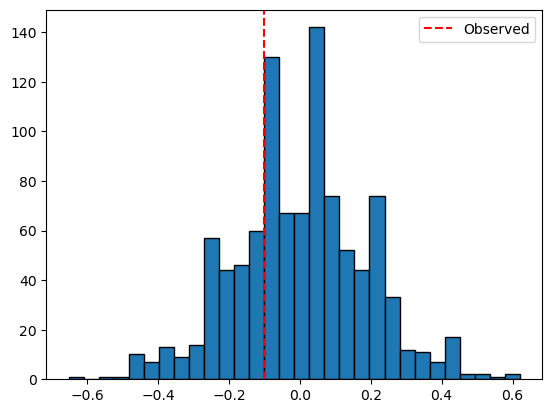

In [17]:
#graph permutation and observered stat
plt.hist(replicates_df['replicates'], bins=30, edgecolor='black')
plt.axvline(observed_statistic, color='red', linestyle='--', label='Observed')
plt.legend()
plt.show()


In [18]:
#code to get 1000 bootstrapped data examples and a 95% confidence interval

def bootstrap_ci(df, stat_func, n_boot=1000, ci=95):
    stats = []
    for _ in range(n_boot):
        sample = df.sample(frac=1, replace=True)  # resample with replacement
        stats.append(stat_func(sample))
    lower = np.percentile(stats, (100-ci)/2)
    upper = np.percentile(stats, 100 - (100-ci)/2)
    return lower, upper, stats


In [ ]:
#create objects 
five_percent, nintyfive_percent, boot_stats =  bootstrap_ci(update_df, test_stat)

np.float64(-0.4672878883283193)

In [ ]:
#create dataframe
boot_stats_df = pd.DataFrame({'replicates':boot_stats})
boot_stats_df

,replicates
0,0.377643
1,-0.345161
2,-0.054428
3,-0.047047
4,0.291613
...,...
995,0.096375
996,-0.132057
997,-0.016000
998,0.066232


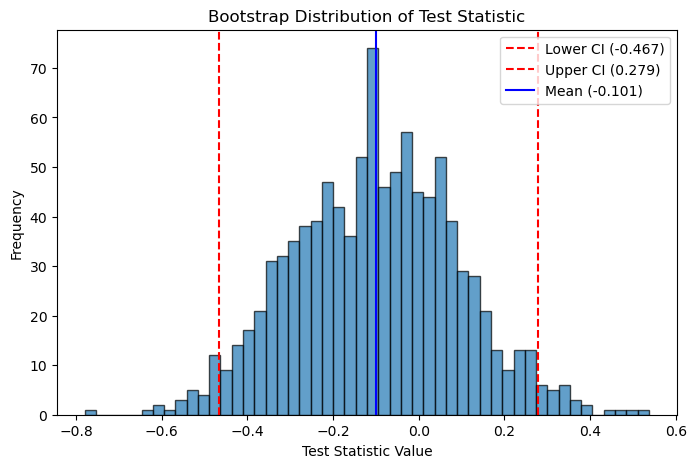

In [26]:
plt.figure(figsize=(8,5))
plt.hist(boot_stats, bins=50, edgecolor='k', alpha=0.7)
plt.axvline(five_percent, color='red', linestyle='--', label=f'Lower CI ({five_percent:.3f})')
plt.axvline(nintyfive_percent, color='red', linestyle='--', label=f'Upper CI ({nintyfive_percent:.3f})')
plt.axvline(np.mean(boot_stats), color='blue', linestyle='-', label=f'Mean ({np.mean(boot_stats):.3f})')

plt.title("Bootstrap Distribution of Test Statistic")
plt.xlabel("Test Statistic Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [31]:
#create function to identify median of "Happiness_Index (1-10)"
def happiness_median(df):
    men_data = df[df['Gender'] == 'male']['Happiness_Index(1-10)']
    other_data = df[df['Gender'].isin(['female', 'other'])]['Happiness_Index(1-10)']
    men_median = men_data.median()
    other_median = other_data.median()
    return men_median - other_median

In [32]:
#observed statistic
happiness_median(update_df)

-0.5

In [35]:
#bootstrap 
def bootstrap_median(df, stat_func, n_boot=1000, ci=95):
    median = []
    for _ in range(n_boot):
        sample = df.sample(frac=1, replace=True)  # resample with replacement
        median.append(stat_func(sample))
    lower = np.percentile(median, (100-ci)/2)
    upper = np.percentile(median, 100 - (100-ci)/2)
    
    return lower, upper, median


In [45]:
#create object
five_percent1, nintyfive_percent1, Boot_med = bootstrap_median(update_df, happiness_median)
Boot_med

[-1.0,
 -1.0,
 -1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 -1.0,
 1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 -0.5,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -0.5,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 -0.5,
 -1.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 -1.0,
 1.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 1.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 0.5,
 -1.0,
 1.0,


In [46]:
Boot_med_df = pd.DataFrame({'Medians':Boot_med})
Boot_med_df

,Medians
0,-1.0
1,-1.0
2,-1.0
3,1.0
4,0.0
...,...
995,0.0
996,-1.0
997,1.0
998,0.5


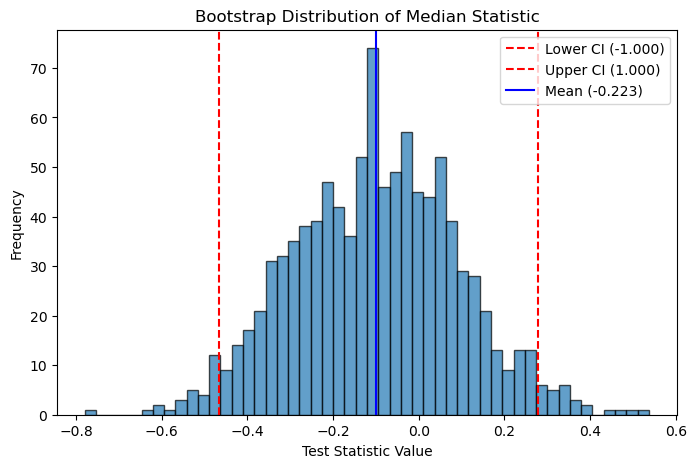

In [47]:
plt.figure(figsize=(8,5))
plt.hist(boot_stats_df, bins=50, edgecolor='k', alpha=0.7)
plt.axvline(five_percent, color='red', linestyle='--', label=f'Lower CI ({five_percent1:.3f})')
plt.axvline(nintyfive_percent, color='red', linestyle='--', label=f'Upper CI ({nintyfive_percent1:.3f})')
plt.axvline(np.mean(boot_stats), color='blue', linestyle='-', label=f'Mean ({np.mean(Boot_med_df):.3f})')

plt.title("Bootstrap Distribution of Median Statistic")
plt.xlabel("Test Statistic Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()